In [1]:
import pandas as pd
import numpy as np
import datetime as datetime

In [2]:
import boto3
import pandas as pd
from sagemaker import get_execution_role


In [3]:
#access data from AWS S3
role = get_execution_role()
bucket='defibanking'
data_key = 'XBTUSD_BitMEX_funding.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

In [4]:
data_funding = pd.read_csv(data_location)
data_funding.shape

(3185, 3)

In [5]:
data_funding.head(10)

,timestamp,symbol,funding
0,2017-01-01 04:00:00,XBTUSD,0.1000
1,2017-01-01 12:00:00,XBTUSD,0.0982
2,2017-01-01 20:00:00,XBTUSD,0.1365
3,2017-01-02 04:00:00,XBTUSD,0.2787
4,2017-01-02 12:00:00,XBTUSD,0.0829
5,2017-01-02 20:00:00,XBTUSD,0.2059
6,2017-01-03 04:00:00,XBTUSD,0.0295
7,2017-01-03 12:00:00,XBTUSD,0.3163
8,2017-01-03 20:00:00,XBTUSD,0.0598
9,2017-01-04 04:00:00,XBTUSD,-0.0506


In [6]:
data_funding.describe()

,funding
count,3185.000000
mean,0.008064
std,0.116548
min,-0.375000
25%,-0.024900
50%,0.010000
75%,0.015600
max,0.375000


In [7]:
#access data from AWS S3
role = get_execution_role()
bucket='defibanking'
data_key2 = 'XBTUSD_BitMEX_8H.csv'
data_location2 = 's3://{}/{}'.format(bucket, data_key2)
data_8H = pd.read_csv(data_location2)
data_8H.shape

(3185, 6)

In [8]:
data_8H.head(10)

,timestamp,open,high,low,close,volume
0,2017-01-01 00:00:00,968.29,968.86,960.90,967.50,2455959
1,2017-01-01 08:00:00,967.50,981.75,965.43,981.75,4425787
2,2017-01-01 16:00:00,981.75,1009.87,981.07,1002.16,13400608
3,2017-01-02 00:00:00,1002.16,1022.54,996.54,1022.54,8754585
4,2017-01-02 08:00:00,1022.54,1033.00,997.35,1028.01,13713178
5,2017-01-02 16:00:00,1028.01,1035.00,1003.73,1022.76,14555458
6,2017-01-03 00:00:00,1022.76,1037.26,1015.00,1020.97,7813608
7,2017-01-03 08:00:00,1020.97,1030.00,1003.00,1019.95,7566001
8,2017-01-03 16:00:00,1019.95,1040.66,1018.11,1036.90,6142995
9,2017-01-04 00:00:00,1036.90,1070.00,1036.49,1065.74,8791991


In [9]:
data_8H.describe()

,open,high,low,close,volume
count,3185.000000,3185.000000,3185.000000,3185.000000,3.185000e+03
mean,6252.795394,6371.030515,6117.955149,6254.555900,5.813796e+08
std,3555.752807,3648.301829,3438.725765,3554.264594,6.010662e+08
min,744.110000,779.580000,724.000000,744.110000,4.515610e+05
25%,3601.500000,3638.500000,3561.500000,3602.800000,9.626843e+07
50%,6384.000000,6432.000000,6316.500000,6384.500000,4.413138e+08
75%,8471.000000,8632.000000,8320.000000,8471.000000,8.372346e+08
max,19868.000000,20093.000000,19234.000000,19868.000000,5.980463e+09


In [10]:
#aggregate needed features
data_8H['funding'] = data_funding['funding']

In [11]:
data_8H.head(10)


,timestamp,open,high,low,close,volume,funding
0,2017-01-01 00:00:00,968.29,968.86,960.90,967.50,2455959,0.1000
1,2017-01-01 08:00:00,967.50,981.75,965.43,981.75,4425787,0.0982
2,2017-01-01 16:00:00,981.75,1009.87,981.07,1002.16,13400608,0.1365
3,2017-01-02 00:00:00,1002.16,1022.54,996.54,1022.54,8754585,0.2787
4,2017-01-02 08:00:00,1022.54,1033.00,997.35,1028.01,13713178,0.0829
5,2017-01-02 16:00:00,1028.01,1035.00,1003.73,1022.76,14555458,0.2059
6,2017-01-03 00:00:00,1022.76,1037.26,1015.00,1020.97,7813608,0.0295
7,2017-01-03 08:00:00,1020.97,1030.00,1003.00,1019.95,7566001,0.3163
8,2017-01-03 16:00:00,1019.95,1040.66,1018.11,1036.90,6142995,0.0598
9,2017-01-04 00:00:00,1036.90,1070.00,1036.49,1065.74,8791991,-0.0506


In [12]:
data_8H.isna().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
funding      0
dtype: int64

In [13]:
#visualisation

from matplotlib import pyplot
values = data_8H.values
groups =  [4, 6]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(data_8H.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

<Figure size 640x480 with 2 Axes>

In [14]:
data_8H = data_8H.drop(columns = ['high','low'])

In [15]:
data_8H.head(5)

,timestamp,open,close,volume,funding
0,2017-01-01 00:00:00,968.29,967.50,2455959,0.1000
1,2017-01-01 08:00:00,967.50,981.75,4425787,0.0982
2,2017-01-01 16:00:00,981.75,1002.16,13400608,0.1365
3,2017-01-02 00:00:00,1002.16,1022.54,8754585,0.2787
4,2017-01-02 08:00:00,1022.54,1028.01,13713178,0.0829


In [16]:
final_data = data_funding.copy()
final_data['timestamp'] = data_8H['timestamp']
final_data['funding'] = data_8H['funding']
final_data['open'] = data_8H['open']
final_data['close'] = data_8H['close']
final_data['volume'] = data_8H['volume']
final_data = final_data.drop(columns = 'symbol')

In [17]:
final_data.head(5)

,timestamp,funding,open,close,volume
0,2017-01-01 00:00:00,0.1000,968.29,967.50,2455959
1,2017-01-01 08:00:00,0.0982,967.50,981.75,4425787
2,2017-01-01 16:00:00,0.1365,981.75,1002.16,13400608
3,2017-01-02 00:00:00,0.2787,1002.16,1022.54,8754585
4,2017-01-02 08:00:00,0.0829,1022.54,1028.01,13713178


In [18]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [19]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 


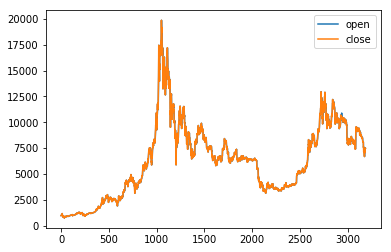

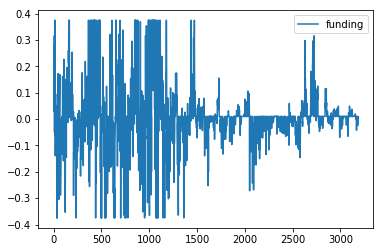

In [20]:
# load dataset
dataset = final_data.copy()
dataset = dataset.drop(columns = 'timestamp')

pyplot.plot(dataset['open'], label = 'open')
pyplot.plot(dataset['close'], label = 'close')

pyplot.legend()
pyplot.show()

pyplot.plot(dataset['funding'], label = 'funding')
pyplot.legend()
pyplot.show()

In [21]:
print(dataset.head(10))
values = dataset.values
print(values)

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)
print(reframed.dtypes)


   funding     open    close    volume
0   0.1000   968.29   967.50   2455959
1   0.0982   967.50   981.75   4425787
2   0.1365   981.75  1002.16  13400608
3   0.2787  1002.16  1022.54   8754585
4   0.0829  1022.54  1028.01  13713178
5   0.2059  1028.01  1022.76  14555458
6   0.0295  1022.76  1020.97   7813608
7   0.3163  1020.97  1019.95   7566001
8   0.0598  1019.95  1036.90   6142995
9  -0.0506  1036.90  1065.74   8791991
[[1.00000000e-01 9.68290000e+02 9.67500000e+02 2.45595900e+06]
 [9.82000000e-02 9.67500000e+02 9.81750000e+02 4.42578700e+06]
 [1.36500000e-01 9.81750000e+02 1.00216000e+03 1.34006080e+07]
 ...
 [1.00000000e-02 7.31650000e+03 7.52600000e+03 1.36654939e+09]
 [5.40000000e-03 7.52600000e+03 7.50450000e+03 4.61936311e+08]
 [8.70000000e-03 7.50450000e+03 7.47200000e+03 3.81938091e+08]]
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.633333   0.011723   0.011681   0.000335  0.630933
2   0.630933   0.011681   0.012426   0.000665  0.682000
3   0.682000   0.01

In [22]:
# split into train and test sets
values = reframed.values

n_train_hours = 365 * 5
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(1825, 1, 4) (1825,) (1359, 1, 4) (1359,)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

1359/1359 [==============================] - 0s 329us/step
Test score: 1.460945228077718
Test accuracy: 0.0
Train on 1825 samples, validate on 1359 samples
Epoch 1/20
 - 2s - loss: 1.2371 - acc: 0.0197 - val_loss: 0.9669 - val_acc: 0.0000e+00
Epoch 2/20
 - 0s - loss: 0.9425 - acc: 0.0197 - val_loss: 0.8184 - val_acc: 0.0000e+00
Epoch 3/20
 - 0s - loss: 0.8229 - acc: 0.0389 - val_loss: 0.7461 - val_acc: 0.0000e+00
Epoch 4/20
 - 0s - loss: 0.7574 - acc: 0.0400 - val_loss: 0.7138 - val_acc: 0.0000e+00
Epoch 5/20
 - 0s - loss: 0.7244 - acc: 0.0433 - val_loss: 0.7045 - val_acc: 0.0000e+00
Epoch 6/20
 - 0s - loss: 0.7145 - acc: 0.0416 - val_loss: 0.7020 - val_acc: 0.0000e+00
Epoch 7/20
 - 0s - loss: 0.7054 - acc: 0.0482 - val_loss: 0.7000 - val_acc: 0.0000e+00
Epoch 8/20
 - 0s - loss: 0.6979 - acc: 0.0548 - val_loss: 0.6981 - val_acc: 0.0000e+00
Epoch 9/20
 - 0s - loss: 0.6886 - acc: 0.0597 - 

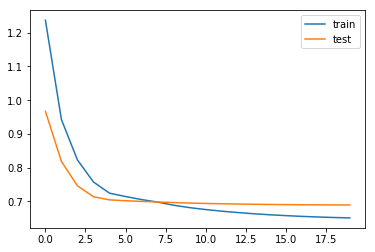

In [23]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score, acc = model.evaluate(test_X, test_y,
                            batch_size=72)
print('Test score:', score)
print('Test accuracy:', acc)

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [24]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.031


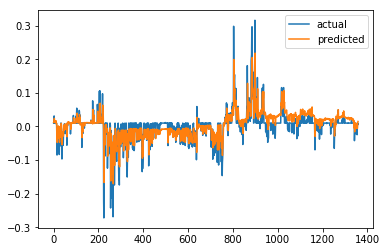

,actual,predicted
1349,0.0060,0.006807
1350,-0.0227,0.004535
1351,-0.0187,-0.005154
1352,0.0045,-0.003998
1353,-0.0152,0.009013
1354,-0.0246,-0.000153
1355,0.0037,-0.005718
1356,0.0100,0.005958
1357,0.0054,0.012967
1358,0.0087,0.014891


In [25]:
pyplot.plot(inv_y, label = 'actual')
pyplot.plot(inv_yhat, label = 'predicted')
pyplot.legend()
pyplot.show()

data = np.array([inv_y,inv_yhat])
data = data.T
columns = ['actual','predicted']
df = pd.DataFrame(data=data, columns =columns)

df.tail(10)

In [26]:
#validate Model

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
print('mean absolute percentage error : ',mape)

mean absolute percentage error :  272.06547260284424


In [27]:
#save data with predicted and atual values on sagemaker
df.to_csv('funding_prediction_continuous_number.csv')

#save data with predicted and atual values on AWS S3
S3 = boto3.client('s3')
SOURCE_FILENAME = 'funding_prediction_continuous_number.csv'
BUCKET_NAME = 'defibanking'

# Uploads the given file using a managed uploader, which will split up large
# files automatically and upload parts in parallel.
S3.upload_file(SOURCE_FILENAME, BUCKET_NAME, SOURCE_FILENAME)

In [28]:
df['actual'] = np.where(df['actual']>0, 1, 0)
df['predicted'] = np.where(df['predicted']>0, 1, 0)

In [29]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['actual'], df['predicted'])
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(df['actual'], df['predicted'])
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(df['actual'], df['predicted'])
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['actual'], df['predicted'])
print('F1 score: %f' % f1)

Accuracy: 0.796174
Precision: 0.884236
Recall: 0.796892
F1 score: 0.838295


In [30]:
# kappa
kappa = cohen_kappa_score(df['actual'], df['predicted'])
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(df['actual'], df['predicted'])
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(df['actual'], df['predicted'])
print(matrix)

Cohens kappa: 0.564676
ROC AUC: 0.795826
[[364  94]
 [183 718]]


In [31]:
# save data to AWS sagemaker about up(1) and down(0)
df.to_csv('funding_prediction_up_down.csv')

In [32]:
# save data to S3 about up(1) and down(0)
S3 = boto3.client('s3')

SOURCE_FILENAME = 'funding_prediction_up_down.csv'
BUCKET_NAME = 'defibanking'
S3.upload_file(SOURCE_FILENAME, BUCKET_NAME, SOURCE_FILENAME)